In [1]:
import numpy as np
import networkx as nx
print("Networkx version: {}".format(nx.__version__))
import seaborn as sns
import matplotlib.pyplot as plt; plt.style.use('ggplot')

Networkx version: 2.4


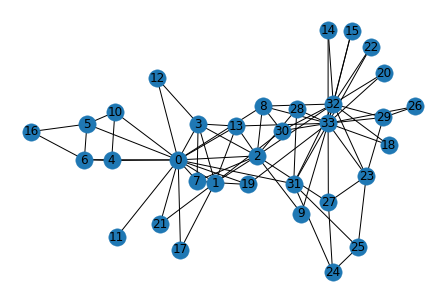

In [24]:
G = nx.karate_club_graph()
# show first 5 graphs
pos = nx.spring_layout(G)
colors = np.array(['r', 'b', 'g'])
label = np.arange(0,len(G))
nx.draw(G, with_labels=True, pos=pos)
plt.show()
plt.close()

In [25]:
d = 0
for i in range(len(G.degree)):
    d = d+G.degree[i]
d*np.log(34)

550.1122418401212

In [26]:
G.degree[1]

9

In [27]:
path=nx.single_source_shortest_path(G ,16)
histogram = [(k, len(v)-1) for k, v in path.items()]
histogram

[(16, 0),
 (5, 1),
 (6, 1),
 (0, 2),
 (10, 2),
 (4, 2),
 (1, 3),
 (2, 3),
 (3, 3),
 (7, 3),
 (8, 3),
 (11, 3),
 (12, 3),
 (13, 3),
 (17, 3),
 (19, 3),
 (21, 3),
 (31, 3),
 (30, 4),
 (9, 4),
 (27, 4),
 (28, 4),
 (32, 4),
 (33, 4),
 (24, 4),
 (25, 4),
 (23, 5),
 (14, 5),
 (15, 5),
 (18, 5),
 (20, 5),
 (22, 5),
 (29, 5),
 (26, 5)]

No handles with labels found to put in legend.


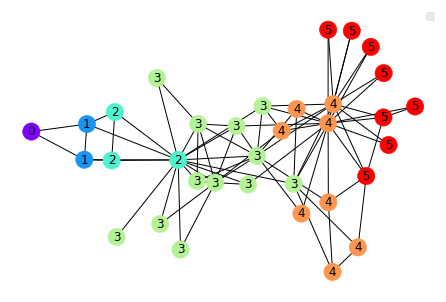

In [28]:
labels = np.arange(0,len(G))
for k, l in histogram: 
    labels[k] = l

import matplotlib
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=0, vmax=5)
color= cmap(norm(labels))

nx.draw(G, node_color=color, labels = dict(histogram), pos=pos)

plt.legend()
plt.show()

In [30]:
A = nx.adjacency_matrix(G).toarray()
np.fill_diagonal(A, 0)
D = np.diag(sum(A)).astype(np.float64)
P0 = A/A.sum(axis=0, keepdims=True).astype(np.float64)
np.sum(P0,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
import scipy.sparse.linalg as sla
def steady_state(P):
    """
    Calculates the steady state probability vector for a regular Markov
    transition matrix P
    Parameters
    ----------
    P        : matrix (kxk)
               an ergodic Markov transition probability matrix
    Returns
    -------
    implicit : matrix (kx1)
               steady state distribution
    """

    v,d=sla.eigs(P, k=1, which='LR')

    # for a regular P maximum eigenvalue will be 1
    #mv=max(v)
    # find its position
    #i=v.tolist().index(mv)

    # normalize eigenvector corresponding to the eigenvalue 1
    return d/sum(d)

In [34]:
from numpy import linalg as LA
def fmpt(P):
    """
    Calculates the matrix of first mean passage times for an
    ergodic transition probability matrix.
    Parameters
    ----------
    P    : matrix (kxk)
           an ergodic Markov transition probability matrix
    Returns
    -------
    M    : matrix (kxk)
           elements are the expected value for the number of intervals
           required for  a chain starting in state i to first enter state j
           If i=j then this is the recurrence time.
    References
    ----------
    
    .. [1] Kemeny, John, G. and J. Laurie Snell (1976) Finite Markov
       Chains. Springer-Verlag. Berlin
    """
    W=np.zeros_like(P)
    ss=steady_state(P)
    k=ss.shape[0]
    for i in range(k):
        W[:,i]=ss.real.flatten()
    I=np.identity(k)
    Z=LA.inv(I-P+W)
    M=np.zeros_like(P)
    for i in range(k):
        for j in range(k):
            M[i][j] = (Z[i][i]-Z[i][j])/W[i][i]
    return M

/u/yan30/.conda/envs/tf-prob/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


34

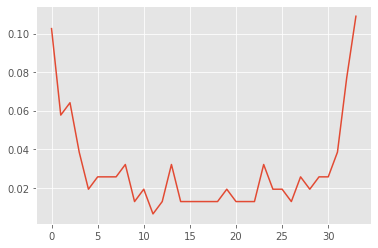

In [37]:
ss=steady_state(P0)
plt.plot(ss)
ss.shape[0]

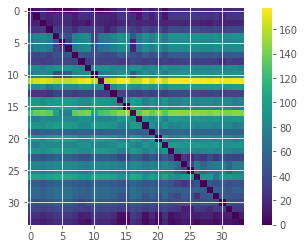

In [110]:
#plt.plot(MFPtimes[:,1705])
MFPtimes = fmpt(P0)
MFPtimes

plt.imshow(MFPtimes)
plt.colorbar()
#plt.clim(0, 1);
plt.show()

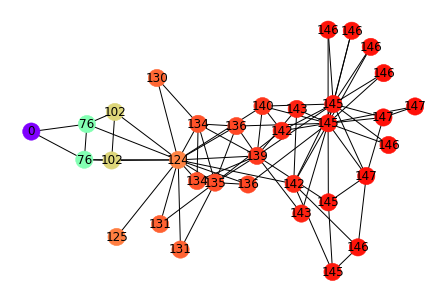

In [112]:
colors = np.arange(0,len(G))
labels = {}
for i in range(len(G)): 
    labels[i] = MFPtimes[16,i].astype(np.int)
    colors[i] = MFPtimes[16,i]
    
import matplotlib
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=0, vmax=150)
color= cmap(norm(colors))

nx.draw(G, node_color=color, labels = labels, pos=pos)

In [76]:
from numpy import linalg as LA
transCost = np.ones(len(P0),dtype="float64")
transCost[16] = 0
transCost = np.exp(-1*transCost)
TP = np.matmul(np.diag(transCost),P0)
TP
#eigvals, eigvecs = LA.eig(np.matmul(T, P0))
#eigvals

array([[0.        , 0.04087549, 0.03678794, ..., 0.06131324, 0.        ,
        0.        ],
       [0.02299247, 0.        , 0.03678794, ..., 0.        , 0.        ,
        0.        ],
       [0.02299247, 0.04087549, 0.        , ..., 0.        , 0.03065662,
        0.        ],
       ...,
       [0.02299247, 0.        , 0.        , ..., 0.        , 0.03065662,
        0.02163997],
       [0.        , 0.        , 0.03678794, ..., 0.06131324, 0.        ,
        0.02163997],
       [0.        , 0.        , 0.        , ..., 0.06131324, 0.03065662,
        0.        ]])

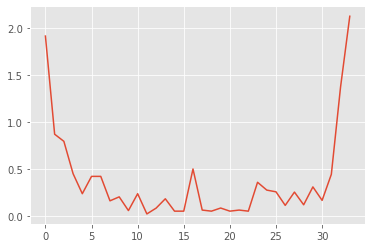

In [77]:
e = np.ones(len(TP)).astype(np.float64)
#e[16] = 1
#plt.plot(np.sort(np.matmul(P0,e)))
plt.plot(np.matmul(TP,e))

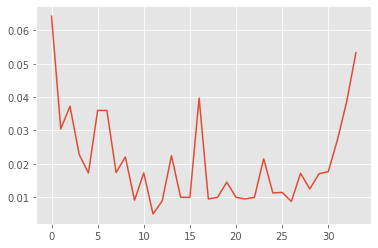

In [78]:
TP4 = np.matmul(np.linalg.matrix_power(TP,4),e)
plt.plot(TP4)

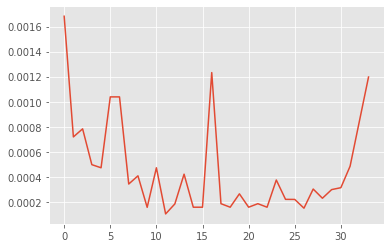

In [79]:
TP8 = np.matmul(np.linalg.matrix_power(TP,8),e)
plt.plot(TP8)

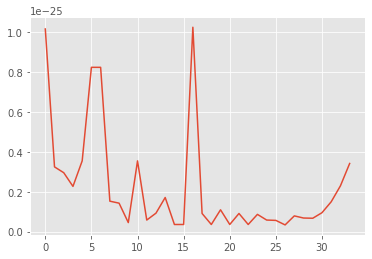

In [94]:
TP64 = np.matmul(np.linalg.matrix_power(TP,64),e)
plt.plot(TP64)

In [95]:
#plt.plot(MFPtimes[:,1705])
TP16N = TP64/sum(TP64)
EP = np.matmul(np.diag(TP16N),P0)
EP0 = EP/EP.sum(axis=0, keepdims=True).astype(np.float64)
np.sum(EP0,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [96]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))
#for 
max = 0
for i in range(len(EP0)):
    if (kl_divergence(EP0[:,i],P0[:,i]) >max):
        max = kl_divergence(EP0[:,i],P0[:,i])
max*5

/u/yan30/.conda/envs/tf-prob/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


2.7138542276946587

In [97]:
P0[:,4]

array([0.33333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.        ,
       0.33333333, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

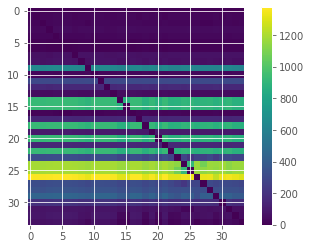

In [98]:
#plt.plot(MFPtimes[:,1705])
MFPtimes = fmpt(EP0)
MFPtimes

plt.imshow(MFPtimes)
plt.colorbar()
#plt.clim(0, 1);
plt.show()

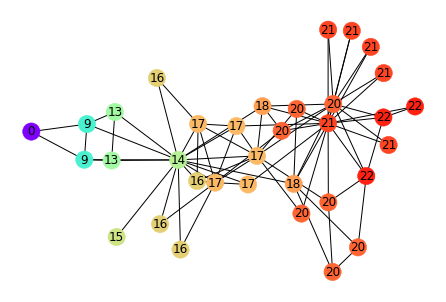

In [100]:
colors = np.arange(0,len(G))
labels = {}
for i in range(len(G)): 
    labels[i] = MFPtimes[16,i].astype(np.int)
    colors[i] = MFPtimes[16,i]
    
import matplotlib
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=0, vmax=23)
color= cmap(norm(colors))

nx.draw(G, node_color=color, labels = labels, pos=pos)

In [101]:
transCost = np.ones(len(P0),dtype="float64")
transCost[16] = 0
transCost = np.exp(-50*transCost)
TP = np.matmul(np.diag(transCost),P0)
TP
#eigvals, eigvecs = LA.eig(np.matmul(T, P0))
#eigvals

array([[0.00000000e+00, 2.14305539e-23, 1.92874985e-23, ...,
        3.21458308e-23, 0.00000000e+00, 0.00000000e+00],
       [1.20546865e-23, 0.00000000e+00, 1.92874985e-23, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.20546865e-23, 2.14305539e-23, 0.00000000e+00, ...,
        0.00000000e+00, 1.60729154e-23, 0.00000000e+00],
       ...,
       [1.20546865e-23, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.60729154e-23, 1.13455873e-23],
       [0.00000000e+00, 0.00000000e+00, 1.92874985e-23, ...,
        3.21458308e-23, 0.00000000e+00, 1.13455873e-23],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.21458308e-23, 1.60729154e-23, 0.00000000e+00]])

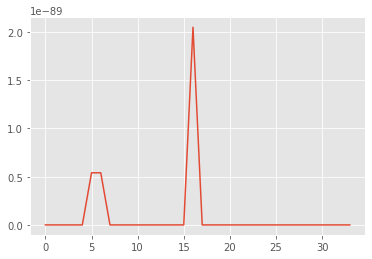

In [105]:
TP8 = np.matmul(np.linalg.matrix_power(TP,8),e)
plt.plot(TP8)

In [106]:
TP16N = TP8/sum(TP8)
EP = np.matmul(np.diag(TP16N),P0)
D = np.diag(sum(EP)).astype(np.float64)
EP0 = EP/EP.sum(axis=0, keepdims=True).astype(np.float64)
np.sum(EP0,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

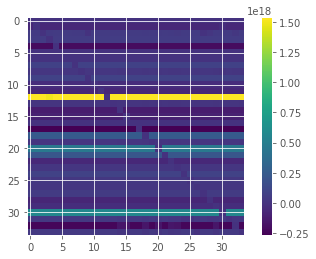

In [107]:
MFPtimes = fmpt(EP0)
MFPtimes

plt.imshow(MFPtimes)
plt.colorbar()
#plt.clim(0, 1);
plt.show()

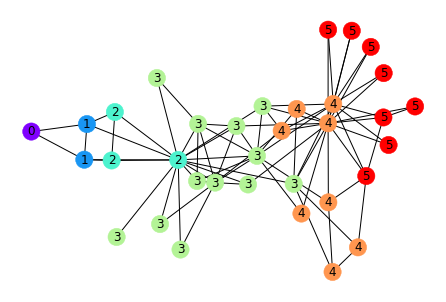

In [108]:
colors = np.arange(0,len(G))
labels = {}
for i in range(len(G)): 
    labels[i] = MFPtimes[16,i].astype(np.int)
    colors[i] = MFPtimes[16,i]
    
import matplotlib
cmap = plt.cm.rainbow
norm = matplotlib.colors.Normalize(vmin=0, vmax=5)
color= cmap(norm(colors))

nx.draw(G, node_color=color, labels = labels, pos=pos)

In [748]:
#import pandas as pd
#edges = pd.read_csv('flightSeats.csv', sep=',')

from scipy.io import loadmat
F = loadmat('flightSeats.mat')
F['A']

array([[  0., 120.,  80., ...,   0.,   0.,   0.],
       [120.,   0., 120., ...,   0.,   0.,   0.],
       [ 80., 120.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [750]:
def check_symmetric(a, rtol=1e-05, atol=1e-08):
    return np.allclose(a, a.T, rtol=rtol, atol=atol)
check_symmetric(F["A"])

True

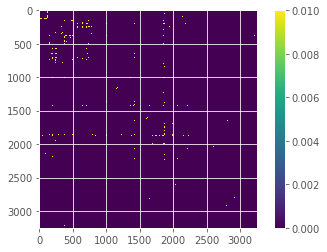

In [895]:
#flights = nx.from_pandas_edgelist(df, 'Source', 'Target', ['weight'])
#A = nx.adjacency_matrix(flights).todense()
flights = nx.from_numpy_matrix(F["A"])
plt.imshow(F['A'])
plt.colorbar()
plt.clim(0, 0.01);
plt.show()

In [417]:
nx.is_connected(flights)

True

In [804]:
path=nx.single_source_shortest_path(flights,1705)
path

{1705: [1705],
 125: [1705, 125],
 794: [1705, 794],
 855: [1705, 855],
 1687: [1705, 1687],
 1688: [1705, 1688],
 1693: [1705, 1693],
 1697: [1705, 1697],
 1701: [1705, 1701],
 1704: [1705, 1704],
 1710: [1705, 1710],
 1720: [1705, 1720],
 1725: [1705, 1725],
 1733: [1705, 1733],
 1742: [1705, 1742],
 1748: [1705, 1748],
 1757: [1705, 1757],
 1767: [1705, 1767],
 1770: [1705, 1770],
 1778: [1705, 1778],
 1779: [1705, 1779],
 1789: [1705, 1789],
 1791: [1705, 1791],
 1794: [1705, 1794],
 1797: [1705, 1797],
 1798: [1705, 1798],
 1801: [1705, 1801],
 1806: [1705, 1806],
 1817: [1705, 1817],
 1819: [1705, 1819],
 1823: [1705, 1823],
 1836: [1705, 1836],
 1837: [1705, 1837],
 1840: [1705, 1840],
 1841: [1705, 1841],
 1844: [1705, 1844],
 1854: [1705, 1854],
 1857: [1705, 1857],
 1860: [1705, 1860],
 1867: [1705, 1867],
 1872: [1705, 1872],
 1881: [1705, 1881],
 1888: [1705, 1888],
 1890: [1705, 1890],
 1893: [1705, 1893],
 1899: [1705, 1899],
 1900: [1705, 1900],
 1901: [1705, 1901],
 198

(array([8.78310131e-04, 0.00000000e+00, 4.91853674e-02, 0.00000000e+00,
        0.00000000e+00, 4.90097053e-01, 0.00000000e+00, 0.00000000e+00,
        1.42725396e+00, 0.00000000e+00, 0.00000000e+00, 7.51833472e-01,
        0.00000000e+00, 0.00000000e+00, 1.12423697e-01, 0.00000000e+00,
        0.00000000e+00, 2.28360634e-02, 0.00000000e+00, 2.63493039e-03]),
 array([0.  , 0.35, 0.7 , 1.05, 1.4 , 1.75, 2.1 , 2.45, 2.8 , 3.15, 3.5 ,
        3.85, 4.2 , 4.55, 4.9 , 5.25, 5.6 , 5.95, 6.3 , 6.65, 7.  ]),
 <a list of 20 Patch objects>)

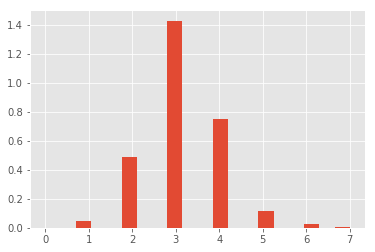

In [806]:
histogram = []
for value in path.values():
    histogram.append(len(value)-1)
plt.hist(histogram, normed=True, bins=20)

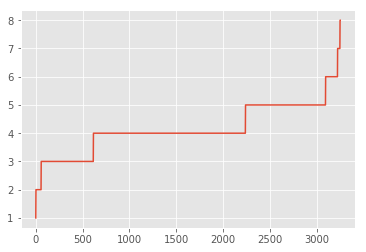

In [426]:
plt.plot(histogram)

In [896]:
D = np.diag(sum(F['A'])).astype(np.float64)
L = (D-F['A'])/F['A'].sum(axis=0, keepdims=True).astype(np.float64)
P0 = F['A']/F['A'].sum(axis=0, keepdims=True).astype(np.float64)
np.sum(P0,axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

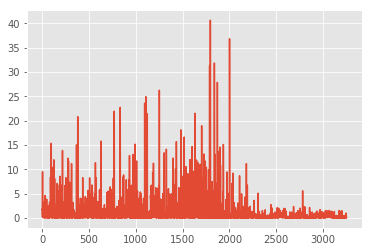

In [900]:
e = np.ones(len(P0)).astype(np.float64)
e[1705] = 1
#plt.plot(np.sort(np.matmul(P0,e)))
plt.plot(np.matmul(P0,e))

In [763]:
P016 = np.matmul(np.linalg.matrix_power(P0,16),e)
P016.sum(axis=0)

3253.0

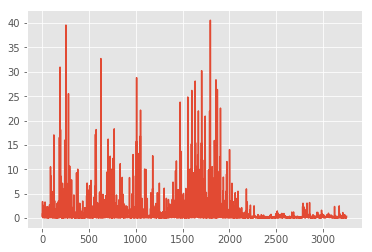

In [764]:
#plt.hist(np.matmul(P04,e), normed=False, bins=50)
plt.plot(P016)

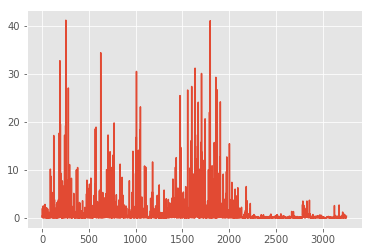

In [776]:
P064 = np.matmul(np.linalg.matrix_power(P0,64),e)
#P064.sum(axis=1)
#plt.plot(np.sort(np.matmul(P064,e)))
plt.plot(P064)

3253

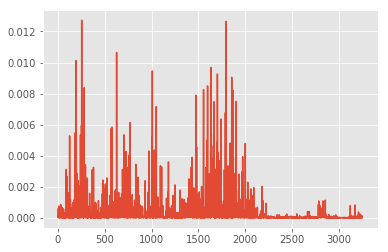

In [765]:
ss=steady_state(P0)
plt.plot(ss)
ss.shape[0]

In [777]:
P064.shape

(3253,)

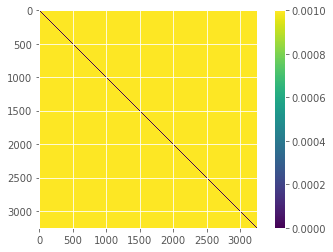

In [778]:
#plt.plot(MFPtimes[:,1705])
TP16N = P064/sum(P064)
EP = np.matmul(np.diag(TP16N),P0)
D = np.diag(sum(EP)).astype(np.float64)
EP0 = EP/EP.sum(axis=0, keepdims=True).astype(np.float64)
np.sum(EP0,axis=0)

#plt.plot(MFPtimes[:,1705])
MFPtimes = fmpt(EP0)
#MFPtimes[:,1705]

plt.imshow(MFPtimes)
plt.colorbar()
plt.clim(0, 0.001);
plt.show()

In [33]:
from numpy import linalg as LA
transCost = np.ones(len(L),dtype="float64")
transCost[1705] = 0
transCost = np.exp(-10*transCost)
TP = np.matmul(np.diag(transCost),P0)
TP
#eigvals, eigvecs = LA.eig(np.matmul(T, P0))
#eigvals

NameError: name 'L' is not defined

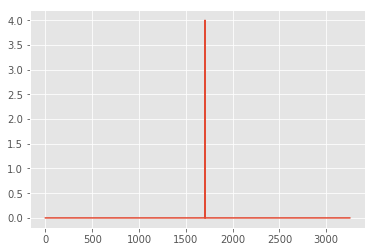

In [785]:
#plt.plot(np.sort(np.matmul(TP,e)))
plt.plot(np.matmul(TP,e))

In [898]:
TP8 = np.linalg.matrix_power(TP,8)
TP8.sum(axis=0)

array([1.24663522e-29, 3.65257442e-30, 5.15135972e-30, ...,
       3.17065049e-29, 1.25511396e-29, 1.83087538e-28])

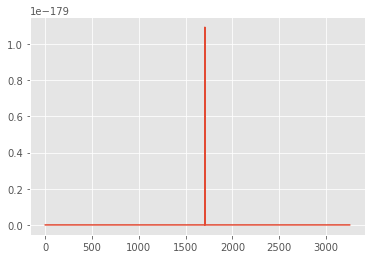

In [390]:
#plt.plot(np.sort(np.matmul(TP8,e)))
plt.plot(np.matmul(TP8,e))

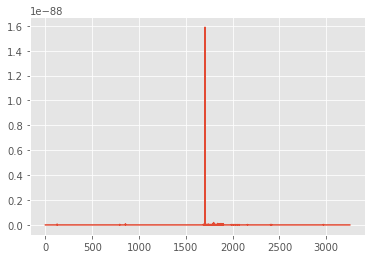

In [901]:
TP32 = np.matmul(np.linalg.matrix_power(TP,32),e)
#plt.plot(np.sort(np.matmul(TP32,e)))
plt.plot(TP32)

In [902]:
TP16N = TP32/sum(TP32)
EP = np.matmul(np.diag(TP16N),P0)
D = np.diag(sum(EP)).astype(np.float64)
EP0 = EP/EP.sum(axis=0, keepdims=True).astype(np.float64)
np.sum(EP0,axis=0)

array([1., 1., 1., ..., 1., 1., 1.])

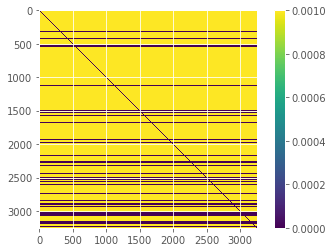

In [903]:
#plt.plot(MFPtimes[:,1705])
TP16N = TP32/sum(TP32)
EP = np.matmul(np.diag(TP16N),P0)
D = np.diag(sum(EP)).astype(np.float64)
EP0 = EP/EP.sum(axis=0, keepdims=True).astype(np.float64)
np.sum(EP0,axis=0)

#plt.plot(MFPtimes[:,1705])
MFPtimes = fmpt(EP0)
#MFPtimes[:,1705]

plt.imshow(MFPtimes)
plt.colorbar()
plt.clim(0, 0.001);
plt.show()

(array([8.42113853e-04, 0.00000000e+00, 5.89479697e-03, 3.95793511e-02,
        1.68422771e-03, 8.42113853e-03, 4.48004570e-01, 1.34738217e-02,
        2.05475780e-01, 1.14780118e+00, 1.43159355e-02, 5.34742297e-01,
        1.80212365e-01, 5.89479697e-03, 1.03580004e-01, 4.21056927e-03,
        8.42113853e-04, 2.18949602e-02, 0.00000000e+00, 2.52634156e-03]),
 array([0.        , 0.36504392, 0.73008785, 1.09513177, 1.4601757 ,
        1.82521962, 2.19026355, 2.55530747, 2.9203514 , 3.28539532,
        3.65043925, 4.01548317, 4.38052709, 4.74557102, 5.11061494,
        5.47565887, 5.84070279, 6.20574672, 6.57079064, 6.93583457,
        7.30087849]),
 <a list of 20 Patch objects>)

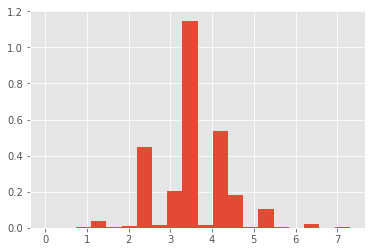

In [904]:
plt.hist(MFPtimes[1705], normed=True, bins=20)

In [905]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))
#for 
max = 0
for i in range(len(EP0)):
    if (kl_divergence(EP0[:,i],P0[:,i]) >max):
        max = kl_divergence(EP0[:,i],P0[:,i])
max*7

/home/yan30/.conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


31.78732578999189

In [906]:
d = 0
for i in range(len(flights.degree)):
    d = d+flights.degree[i]
d*np.log(len(flights))

307270.1272084285

In [328]:
import scipy.sparse.linalg as sla
#eigvals, eigvecs = sla.eigs(TP, k=5, sigma=1.0, which='LR')
eigvals, eigvecs = sla.eigs(TP, k=5, which='LR')
eigvals, eigvecs

(array([1.49695106e-03+0.j, 4.49732726e-05+0.j, 4.44606824e-05+0.j,
        4.38754876e-05+0.j, 4.34335245e-05+0.j]),
 array([[ 2.39546500e-11+0.j,  1.89622736e-02+0.j, -5.06509430e-04+0.j,
          5.57467332e-04+0.j, -1.72037002e-04+0.j],
        [ 7.29697898e-12+0.j,  1.91741759e-02+0.j, -5.19203577e-04+0.j,
          5.80638212e-04+0.j, -1.81416728e-04+0.j],
        [ 1.02185821e-11+0.j,  1.90786755e-02+0.j, -5.13429558e-04+0.j,
          5.69986204e-04+0.j, -1.77067425e-04+0.j],
        ...,
        [ 6.09241840e-11+0.j,  1.78914191e-02+0.j, -4.33134071e-04+0.j,
          4.46405042e-04+0.j, -1.16762544e-04+0.j],
        [ 2.47995014e-11+0.j,  1.80434639e-02+0.j, -4.41430790e-04+0.j,
          4.59069081e-04+0.j, -1.21689224e-04+0.j],
        [ 3.59962221e-09+0.j,  1.66039603e-02+0.j, -3.60199582e-04+0.j,
          3.86680321e-04+0.j, -6.37133612e-05+0.j]]))

KeyboardInterrupt: 

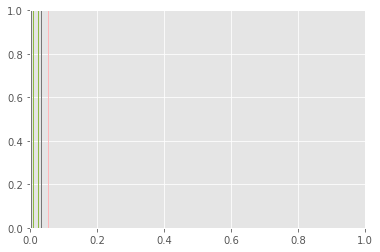

In [46]:
from scipy.io import loadmat
x = loadmat('brainSC.mat')
plt.hist(x["A"], normed=True, bins=30)

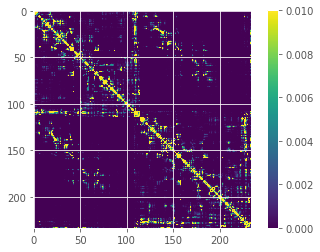

In [36]:
plt.imshow(x["A"])
plt.colorbar()
plt.clim(0, 0.01);
plt.show()

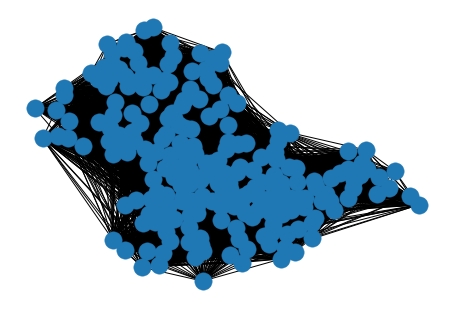

In [29]:
g = nx.from_numpy_matrix(x["A"])
pos = nx.spring_layout(g)
nx.draw(g, pos=pos)
plt.show()
plt.close()

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0., 30.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 array([51.03965803, 51.07299137, 51.1063247 , 51.13965803, 51.17299137,
        51.2063247 , 51.23965803, 51.27299137, 51.3063247 , 51.33965803,
        51.37299137, 51.4063247 , 51.43965803, 51.47299137, 51.5063247 ,
        51.53965803, 51.57299137, 51.6063247 , 51.63965803, 51.67299137,
        51.7063247 , 51.73965803, 51.77299137, 51.8063247 , 51.83965803,
        51.87299137, 51.9063247 , 51.93965803, 51.97299137, 52.0063247 ,
        52.03965803]),
 <a list of 30 Patch objects>)

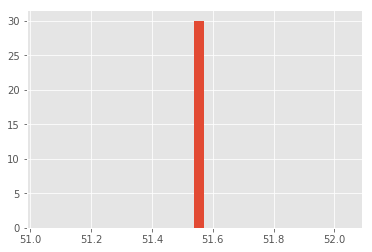

In [38]:
D = np.sum(x["A"])
plt.hist(D, normed=True, bins=30)

([array([ 0.        ,  0.        ,  0.        , 22.27471485,  0.        ,
          0.        ,  0.        ,  0.09559963,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
  array([ 0.        ,  0.        ,  0.19119927, 22.08351558,  0.        ,
          0.        ,  0.        ,  0.        ,  0.09559963,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ]),
  array([ 0.        ,  0.        ,  0.19119927, 22.08351558,  0.        ,
          0.        ,  0.        ,

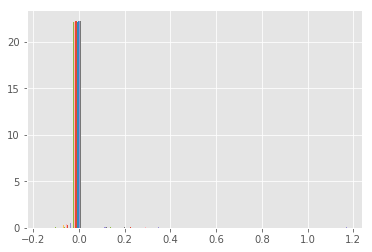

In [33]:
plt.hist(L, normed=True, bins=30)

In [ ]:
CTK = np.linalg.pinv(L)
CTK